## Challenge: Preparing a dataset for modeling

Using a dataset of your choice, select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. Explore the variables using the univariate and bivariate methods you've learned so far.

Next, based on what you learned via your data exploration, create ten new features. Explain the reasoning behind each one.

Finally, use filtering methods to select the five best features and justify your choices.

In [52]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [53]:
#trending youtube videos in CA
youtube = pd.read_csv('../Datasets/CAvideos.csv')
sns.set_style('white')
youtube = youtube[['category_id', 'views', 'likes', 'dislikes', 'comment_count']]
youtube = youtube.set_index('category_id').loc[[22, 25], :].reset_index()
youtube['category_id'] = np.where(youtube['category_id'] == 22, 'People & Blogs', 'News & Politics')

In [54]:
youtube.head()

,category_id,views,likes,dislikes,comment_count
0,People & Blogs,748374,57534,2967,15959
1,People & Blogs,505161,4135,976,1484
2,People & Blogs,1531218,53961,1697,4277
3,People & Blogs,3905245,53072,2437,1979
4,People & Blogs,4204818,187890,167908,77348


In [55]:
# explore individual columns, univariate
print('Variables:', list(youtube))
print(40 * '-')
for column in youtube.loc[:, 'views':'comment_count'].columns:
    print('Column:', column)
    print('count:', youtube[column].count())
    print('min:', youtube[column].min())
    print('max:', youtube[column].max())
    print('mean:', youtube[column].mean())
    print('median:', youtube[column].median())
    print('10th percentile:', youtube[column].quantile(.1))
    print('90th percentile:', youtube[column].quantile(.9))    
    print('standard deviation:', youtube[column].std())
    print(40 * '-')

Variables: ['category_id', 'views', 'likes', 'dislikes', 'comment_count']
----------------------------------------
Column: views
count: 4554
min: 1000
max: 51243149
mean: 547260.872859
median: 172002.0
10th percentile: 29918.600000000002
90th percentile: 1269410.6999999997
standard deviation: 1767774.50579
----------------------------------------
Column: likes
count: 4554
min: 0
max: 677404
mean: 15559.0311814
median: 2754.5
10th percentile: 180.0
90th percentile: 37256.5
standard deviation: 42642.3102304
----------------------------------------
Column: dislikes
count: 4554
min: 0
max: 504340
mean: 1828.02437418
median: 176.0
10th percentile: 20.0
90th percentile: 1780.3999999999996
standard deviation: 16107.5882764
----------------------------------------
Column: comment_count
count: 4554
min: 0
max: 198716
mean: 3031.11286781
median: 825.5
10th percentile: 43.0
90th percentile: 5823.7
standard deviation: 10147.7870979
----------------------------------------


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


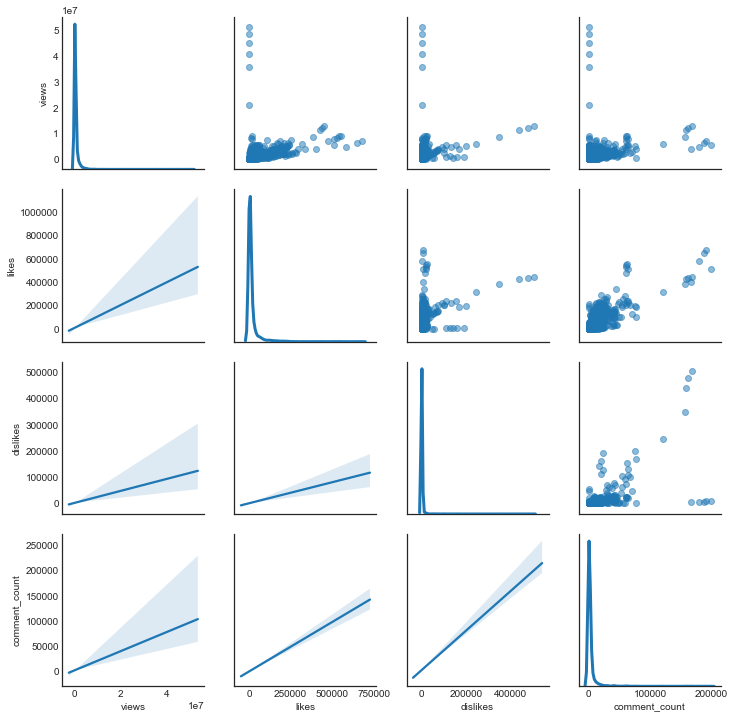

In [56]:
# comparing two continuous variables
# create noise to see all points when plotting only
youtube_jitter = youtube.loc[:, 'views':'comment_count'].dropna()
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(youtube_jitter.shape)),
    columns=youtube_jitter.columns
)

#combine data and noise
youtube_jitter = youtube_jitter.add(jitter)

#declare scatterplot matrix
g = sns.PairGrid(youtube_jitter.dropna(), diag_sharey=False)
#scatterplot
g.map_upper(plt.scatter, alpha=.5)
#fit line summarizing linear relationship of two variables
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
#give info about univariate distribution of variables
g.map_diag(sns.kdeplot, lw=3)
plt.show()

                  views     likes  dislikes  comment_count
views          1.000000  0.401670  0.250573       0.329038
likes          0.401670  1.000000  0.424994       0.821751
dislikes       0.250573  0.424994  1.000000       0.621364
comment_count  0.329038  0.821751  0.621364       1.000000


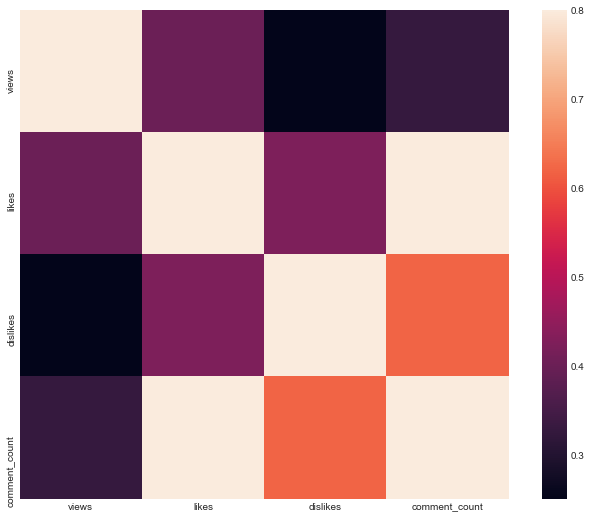

In [57]:
# correlation matrix
corrmat = youtube.corr()
print(corrmat)

# setup matplotlib fig
f, ax = plt.subplots(figsize=(12,9))

# make heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [58]:
# create new df for features
features = pd.get_dummies(youtube['category_id'])

# feature that scales likes and comment count to combine
means = youtube[['likes', 'comment_count']].mean()
stds = youtube[['likes', 'comment_count']].std()
features['likes_comment_count'] = ((youtube[['likes', 'comment_count']] - means) / stds).mean(axis=1)

plotfeatures = youtube.loc[:, ['likes', 'comment_count']]
plotfeatures['likes_comment_count'] = features['likes_comment_count']
corrmat2 = plotfeatures.corr()
print(corrmat2)

                        likes  comment_count  likes_comment_count
likes                1.000000       0.821751             0.954398
comment_count        0.821751       1.000000             0.954398
likes_comment_count  0.954398       0.954398             1.000000


Correlation for People & Blogs for Likes and Comment Count 
--------------------------------------------------------------------------------
                          likes  comment_count  people_likes_comment
likes                 1.000000       0.841896              0.956557
comment_count         0.841896       1.000000              0.962651
people_likes_comment  0.956557       0.962651              1.000000


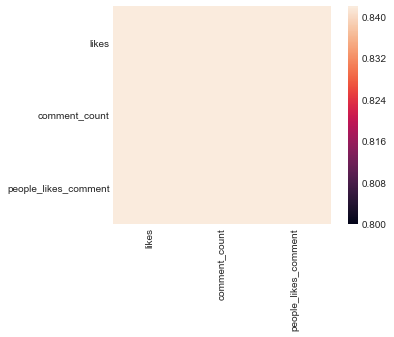


Correlation for News & Politics for Likes and Comment Count 
--------------------------------------------------------------------------------
                        likes  comment_count  news_likes_comment
likes               1.000000       0.778862            0.957074
comment_count       0.778862       1.000000            0.927217
news_likes_comment  0.957074       0.927217            1.000000


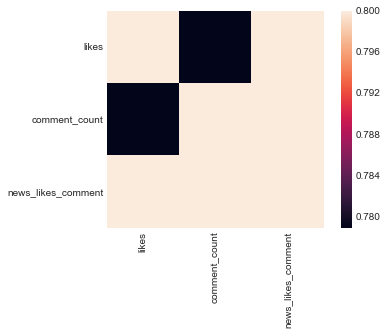

Ttest_indResult(statistic=-12.334224805882805, pvalue=2.0887709838200716e-34)


In [59]:
#set features for news & people likes/comments
people_means = youtube[youtube['category_id'] == 'People & Blogs'][['likes', 'comment_count']].mean()
people_stds = youtube[youtube['category_id'] == 'People & Blogs'][['likes', 'comment_count']].std()
features['people_likes_comment'] = ((youtube[youtube['category_id'] == 'People & Blogs'][['likes', 'comment_count']] - means) / stds).mean(axis=1)

news_means = youtube[youtube['category_id'] == 'News & Politics'][['likes', 'comment_count']].mean()
news_stds = youtube[youtube['category_id'] == 'News & Politics'][['likes', 'comment_count']].std()
features['news_likes_comment'] = ((youtube[youtube['category_id'] == 'News & Politics'][['likes', 'comment_count']] - means) / stds).mean(axis=1)


#set plot features for news and people
plotfeatures3 = youtube[youtube['category_id'] == 'People & Blogs'][['likes', 'comment_count']]
plotfeatures3['people_likes_comment'] = features['people_likes_comment']
corrmat3 = plotfeatures3.corr()
print ('Correlation for People & Blogs for Likes and Comment Count','\n' + 80 * '-' + '\n', corrmat3)
sns.heatmap(corrmat3, vmax=.8, square=True)
plt.show()
plotfeatures4 = youtube[youtube['category_id'] == 'News & Politics'][['likes', 'comment_count']]
plotfeatures4['news_likes_comment'] = features['news_likes_comment']
corrmat4 = plotfeatures4.corr()
print ('\nCorrelation for News & Politics for Likes and Comment Count','\n' + 80 * '-' + '\n', corrmat4)
sns.heatmap(corrmat4, vmax=.8, square=True)
plt.show()

#is the experiement already significant?
print(stats.ttest_ind(youtube[youtube['category_id'] == 'News & Politics'].likes,
                youtube[youtube['category_id'] == 'People & Blogs'].likes))
#group up the individual columns into few many average

In [60]:
# how prominent are views below 100k?
features['views_100kplus'] = np.where(youtube['views'] > 100000, 1, 0)
print(youtube['views'].groupby(features['views_100kplus']).describe())

                 count           mean           std       min        25%  \
views_100kplus                                                             
0               1468.0   48956.277248  2.803198e+04    1000.0   23845.50   
1               3086.0  784302.721970  2.106498e+06  100103.0  167359.25   

                     50%       75%         max  
views_100kplus                                  
0                48883.5   72158.5     99668.0  
1               308779.5  714515.0  51243149.0  


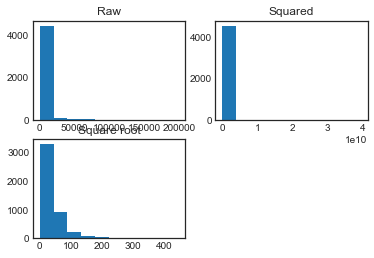

In [61]:
fig = plt.figure()

fig.add_subplot(221)
plt.hist(youtube['comment_count'])
plt.title('Raw')

fig.add_subplot(222)
plt.hist(youtube['comment_count'] * youtube['comment_count'])
plt.title('Squared')

ax = fig.add_subplot(223)
plt.hist(np.sqrt(youtube['comment_count']))
plt.title('Square root')
plt.show()

features['comment_count_sqrt'] = np.sqrt(youtube['comment_count'])

In [62]:
features['inverse_comment_count'] = 1/youtube['comment_count'].dropna()
features['log_views'] = np.log(youtube['views'])

In [63]:
#likes and dislikes with 100k views+ should be weighted twice as much
features['weighted_likes'] = np.where(features['views_100kplus'] == 1, youtube['likes'] * 2, youtube['likes'])
features['weighted_dislikes'] = np.where(features['views_100kplus'] == 1, youtube['dislikes'] * 2, youtube['dislikes'])
features['likes'] = youtube['likes']
features['dislikes'] = youtube['dislikes']

#greater than average of news and politics views return 1
view_mean = youtube.views.mean()
features['news_views_greater_than_mean'] = np.where((youtube['category_id'] == 'News & Politics') & (youtube['views'] > view_mean), 1, 0 )


In [64]:
features.columns

Index(['News & Politics', 'People & Blogs', 'likes_comment_count',
       'people_likes_comment', 'news_likes_comment', 'views_100kplus',
       'comment_count_sqrt', 'inverse_comment_count', 'log_views',
       'weighted_likes', 'weighted_dislikes', 'likes', 'dislikes',
       'news_views_greater_than_mean'],
      dtype='object')

The five columns I am selecting are:
'likes_comment_count',
'views_100kplus',
'weighted_likes',
'weighted_dislikes',
and 'news_views_greater_than_mean'.

I rated the features I had into two categories, 0 for unusable in real life scenarios and 1 for applicable in real life settings. With that, I ranked 'likes_comment_count', 'people_likes_comment', 'news_likes_comment', 'views_100kplus', 'weighted_likes', 'weighted_dislikes', 'likes', 'dislikes', and 'news_views_greater_than_mean' higher than the other features. Out of those, I rated the features that aren't redundant with the data an additional 1 point. From those features, I got rid of features that appeared redundant, getting rid of 'people_likes_comment' and 'news_likes_comments'.